In [7]:

pip install --upgrade scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/10.6 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.1/10.6 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.2/10.6 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.3/10.6 MB 1.2 MB/s eta 0:00:09
   - -------------------------------------- 0.3/10.6 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.3/10.6 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.3/10.6 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.4/10.6 MB 1.0 MB/s eta 0:00:10
   - ------------

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, auc, confusion_matrix
)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFECV, SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv('diabetes.csv')
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


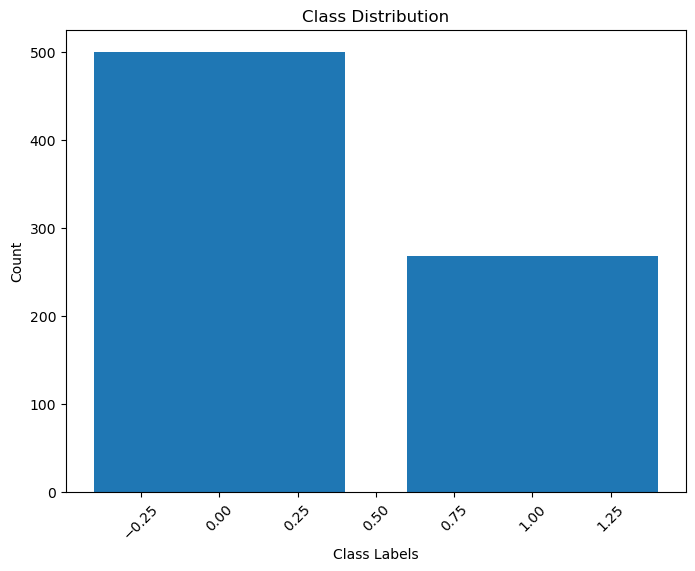

Class Balance (%):
Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64


In [9]:


class_counts = df['Outcome'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

class_balance = class_counts / class_counts.sum() * 100
print("Class Balance (%):")
print(class_balance)









Categorical columns:
Series([], dtype: object)


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


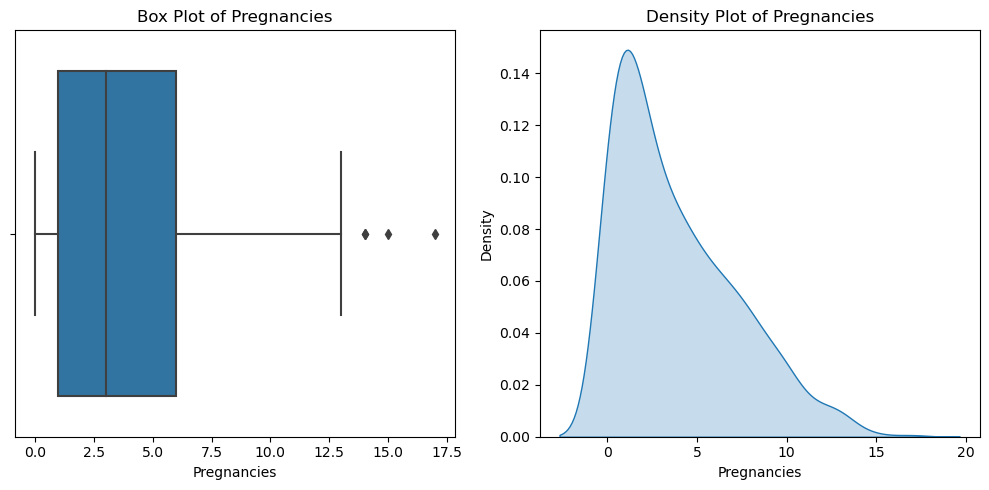

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


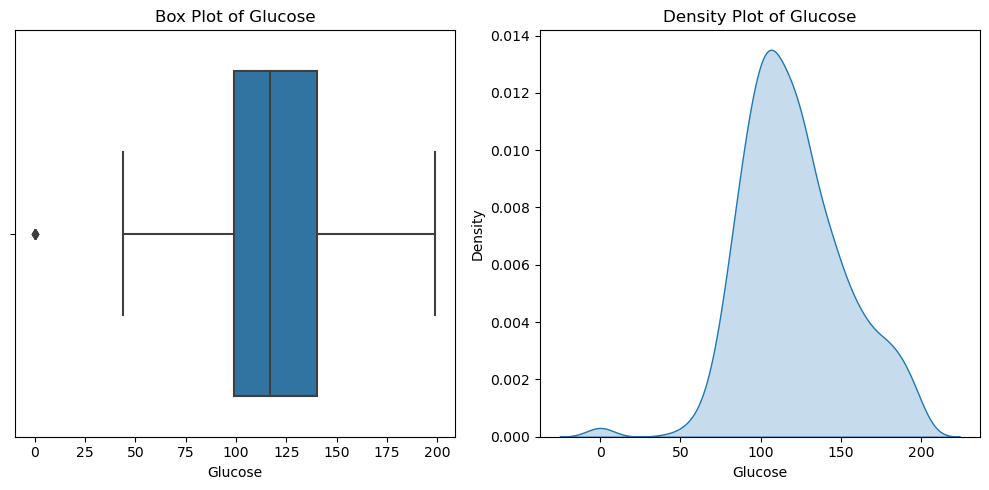

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


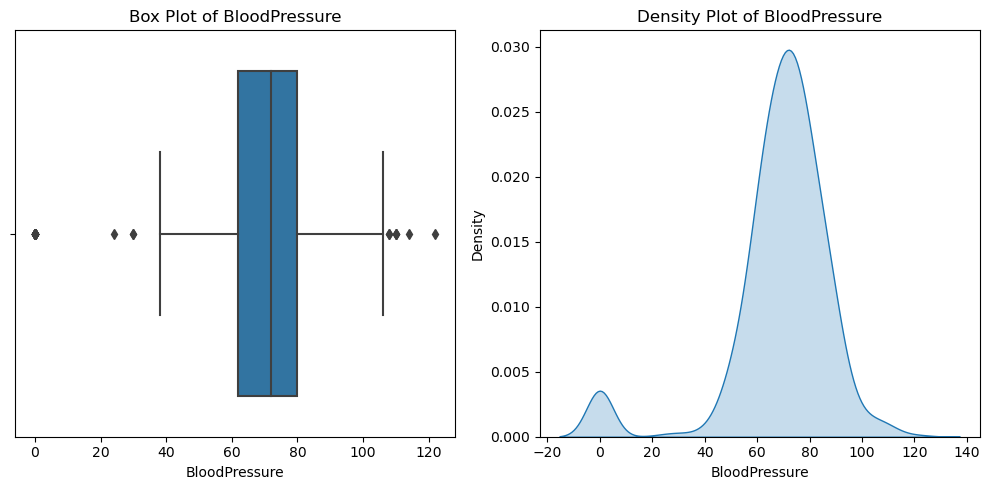

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


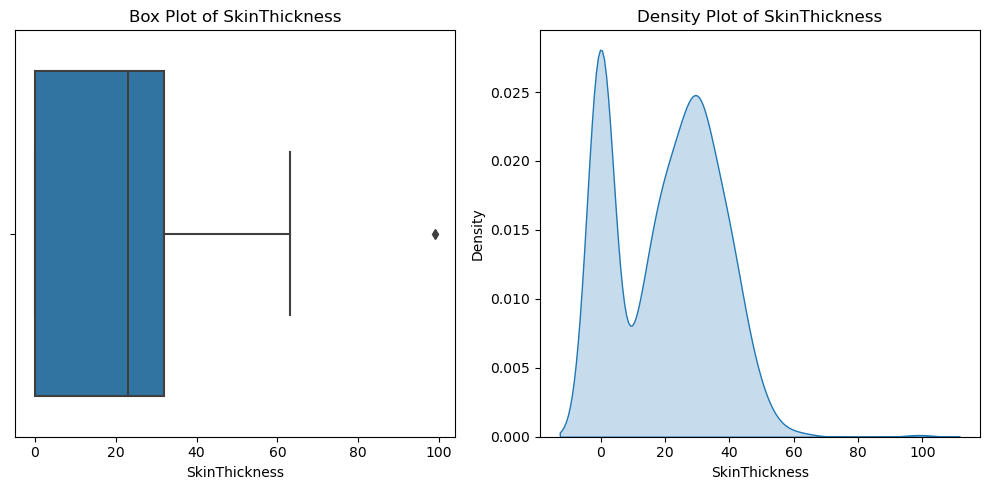

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


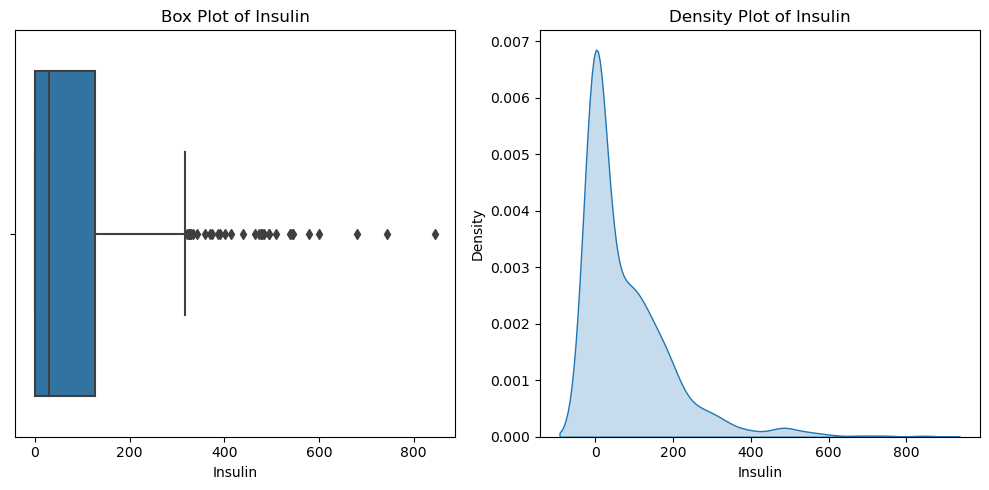

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


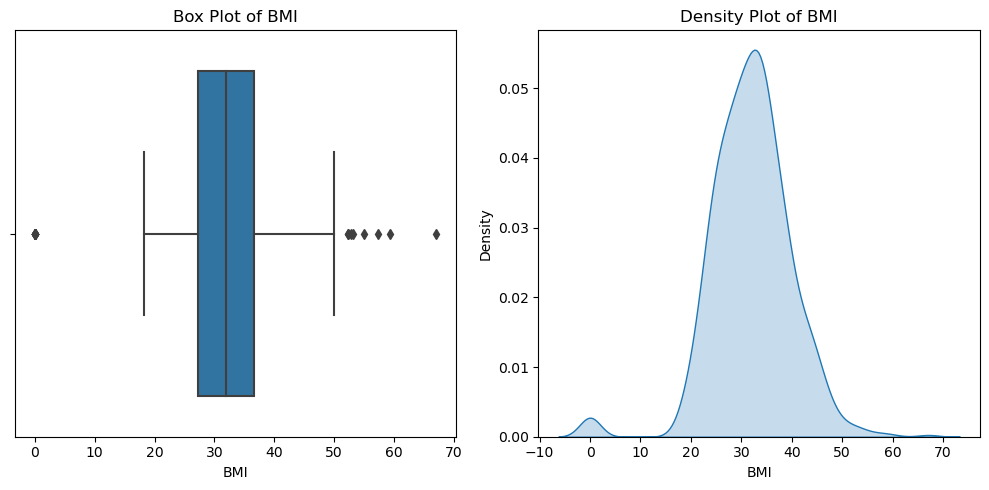

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


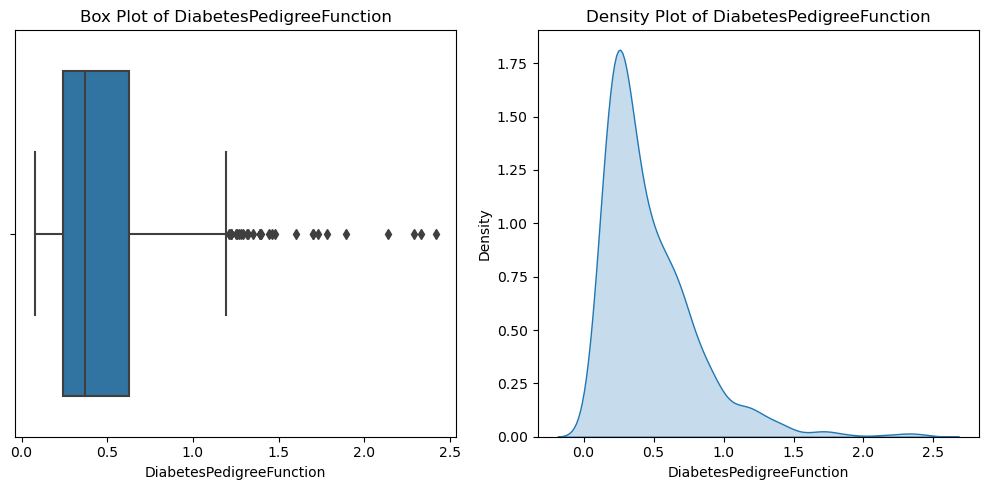

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


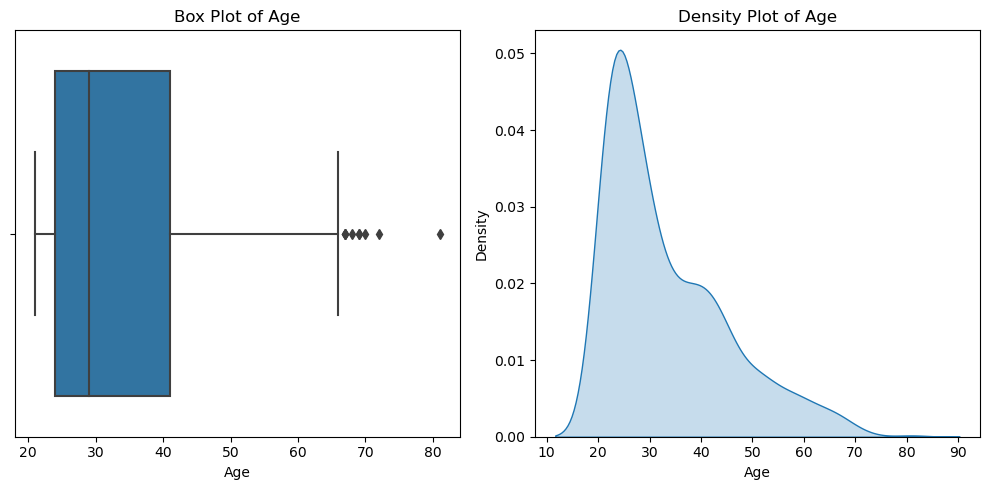

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


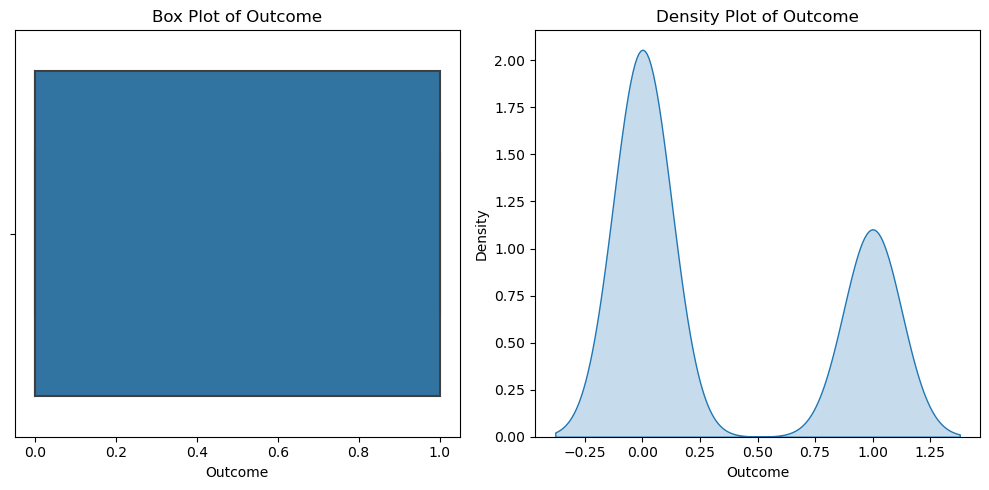

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

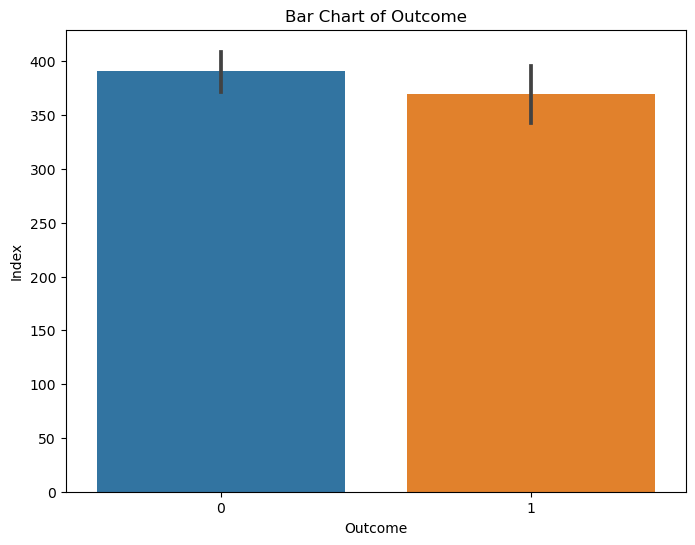

In [10]:
column_data_types = df.dtypes

categorical_columns = column_data_types[column_data_types == 'object']

print("Categorical columns:")
print(categorical_columns)

numeric_columns = df.select_dtypes(include='number')
for var in numeric_columns:
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[var], orient='vertical')
    plt.title(f'Box Plot of {var}')
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[var], fill=True)
    plt.title(f'Density Plot of {var}')
    
    plt.tight_layout()
    plt.show()
 
 for column in df.select_dtypes(include='number'):
    plt.figure(figsize=(8, 6))
    
    if df[column].nunique() <= 10:
        # Create a bar chart for columns with <= 10 unique values
        sns.barplot(x=df[column], y=df.index)
        plt.title(f'Bar Chart of {column}')
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()









Column: Pregnancies
Initial Skewness: 0.9017
Log Transformation Skewness: -1.9940 (Reduction: 2.8957)


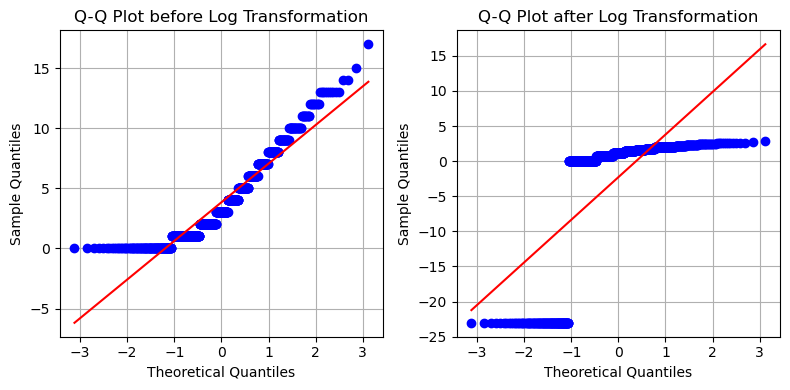

Square Root Transformation Skewness: -0.1589 (Reduction: 1.0606)


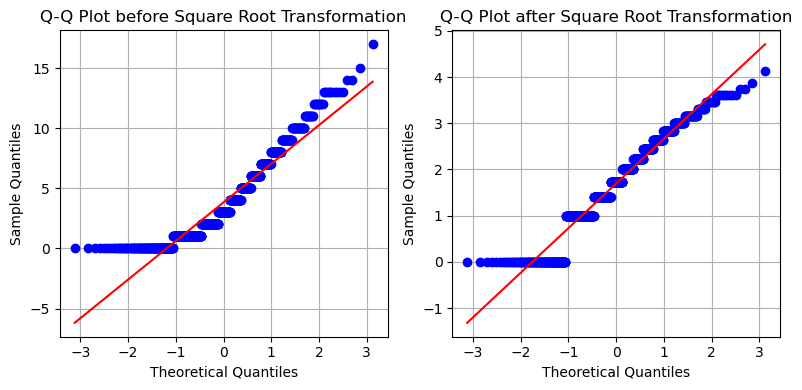



Column: Glucose
Initial Skewness: 0.1738
Log Transformation Skewness: -12.0670 (Reduction: 12.2408)


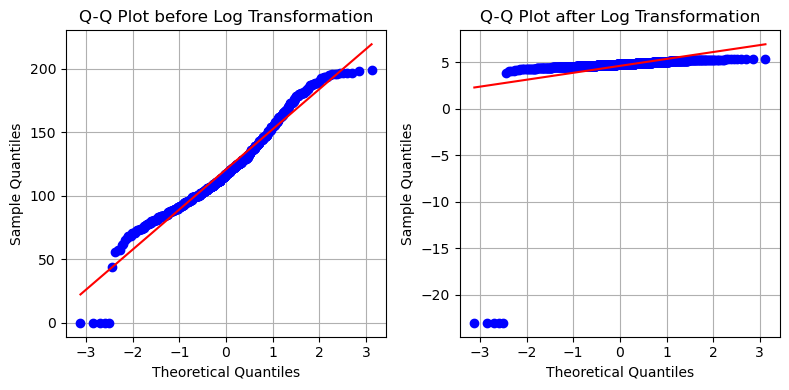

Square Root Transformation Skewness: -1.7183 (Reduction: 1.8920)


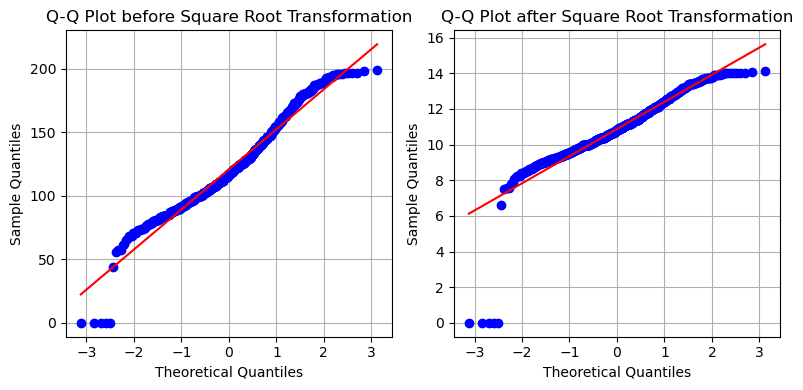



Column: BloodPressure
Initial Skewness: -1.8436
Log Transformation Skewness: -4.3596 (Reduction: 2.5160)


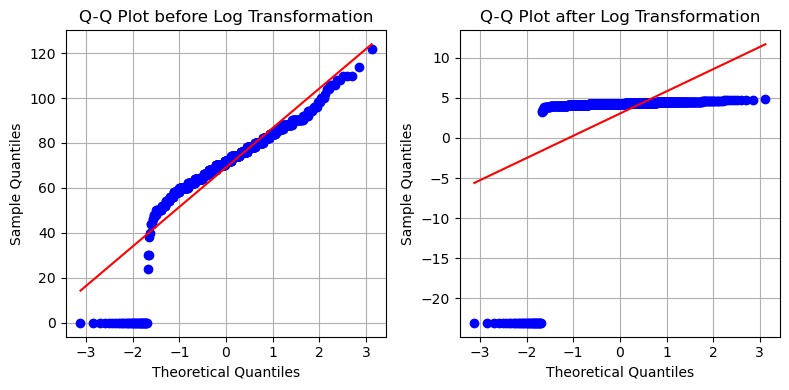

Square Root Transformation Skewness: -3.3986 (Reduction: 1.5550)


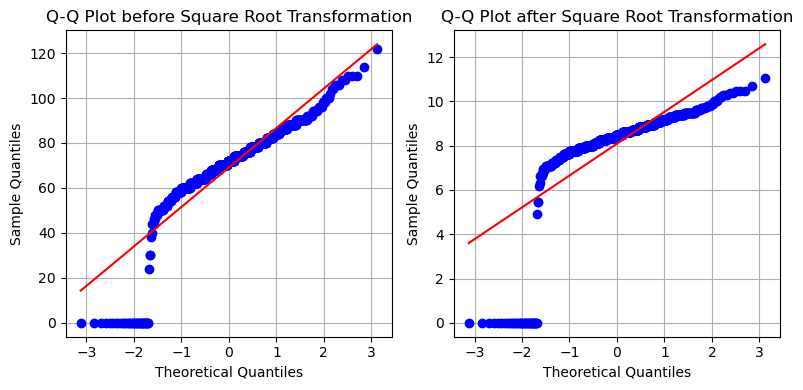



Column: SkinThickness
Initial Skewness: 0.1094
Log Transformation Skewness: -0.8954 (Reduction: 1.0047)


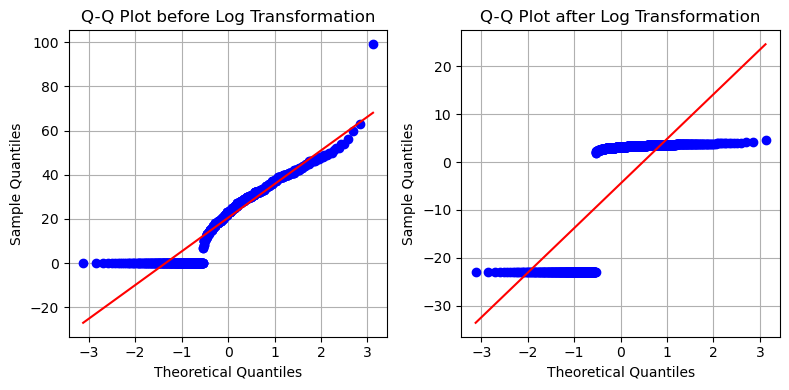

Square Root Transformation Skewness: -0.5735 (Reduction: 0.6829)


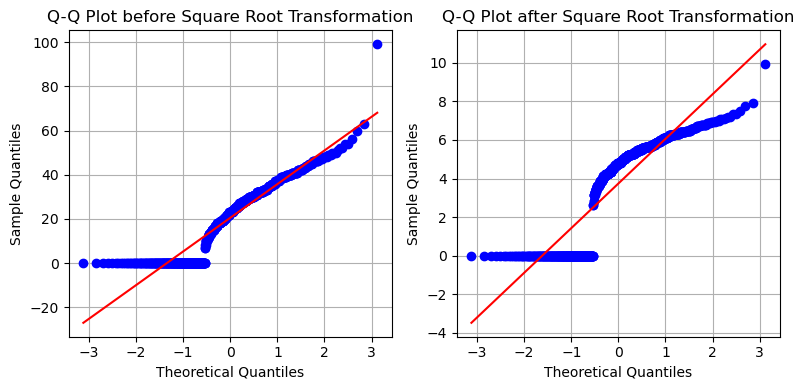



Column: Insulin
Initial Skewness: 2.2723
Log Transformation Skewness: -0.0483 (Reduction: 2.3206)


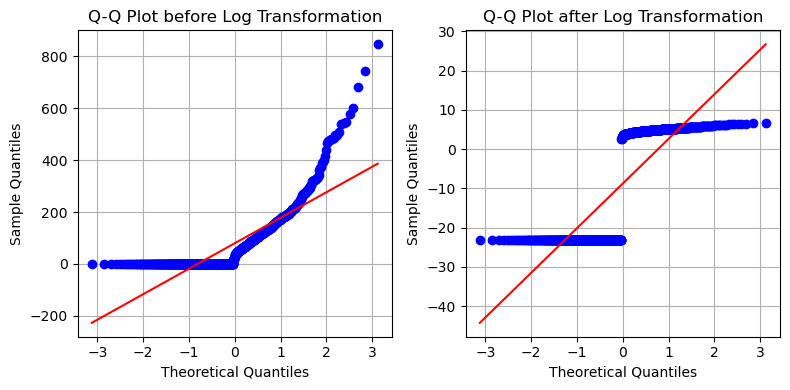

Square Root Transformation Skewness: 0.6300 (Reduction: 1.6423)


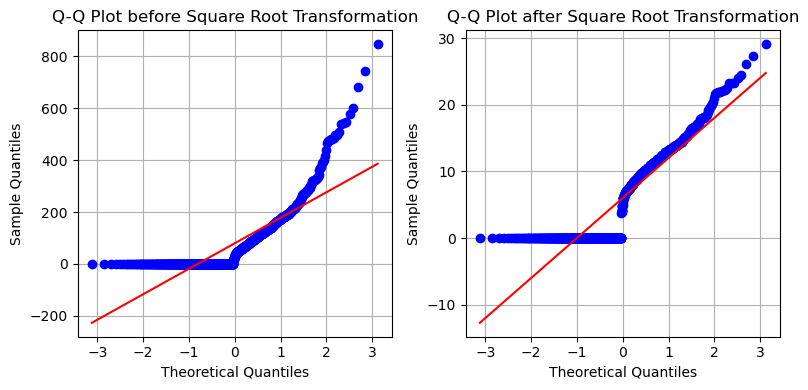



Column: BMI
Initial Skewness: -0.4290
Log Transformation Skewness: -8.1348 (Reduction: 7.7058)


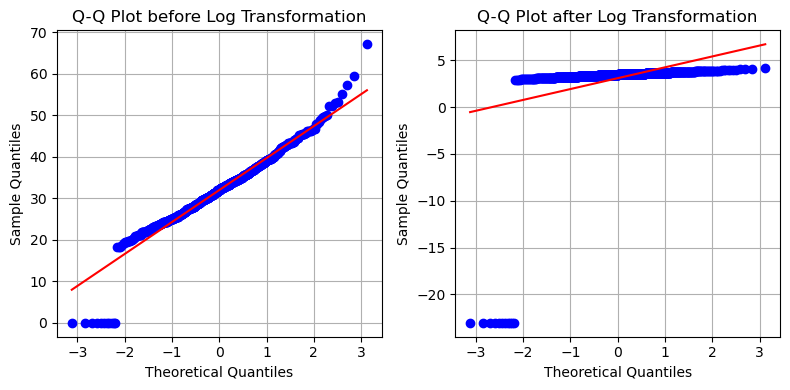

Square Root Transformation Skewness: -3.2389 (Reduction: 2.8099)


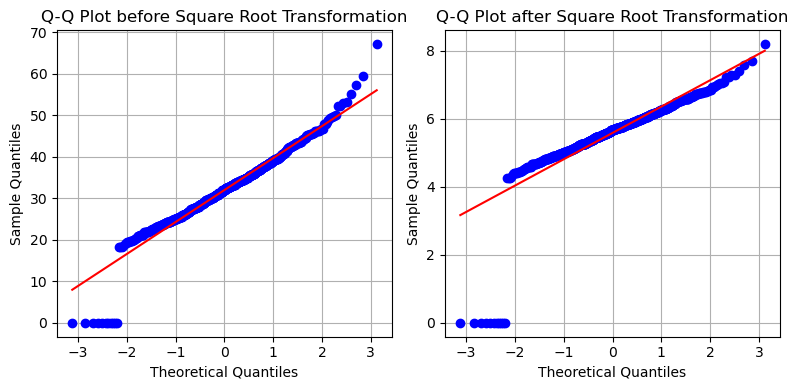



Column: DiabetesPedigreeFunction
Initial Skewness: 1.9199
Log Transformation Skewness: 0.1142 (Reduction: 1.8057)


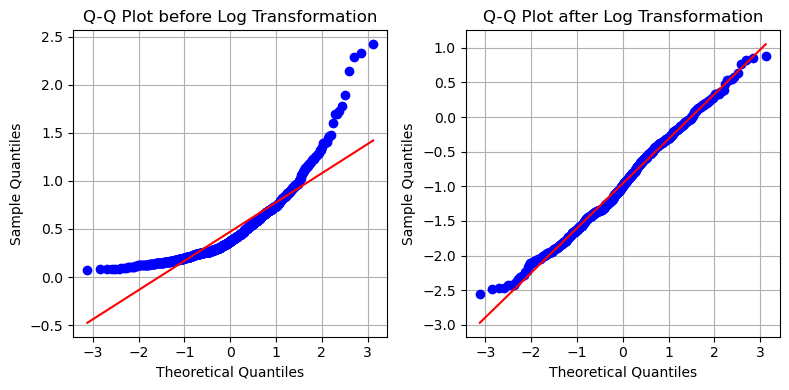

Square Root Transformation Skewness: 0.9018 (Reduction: 1.0181)


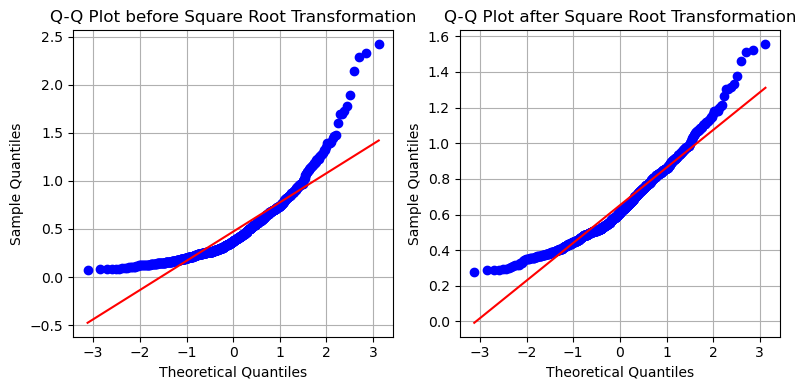



Column: Age
Initial Skewness: 1.1296
Log Transformation Skewness: 0.6017 (Reduction: 0.5279)


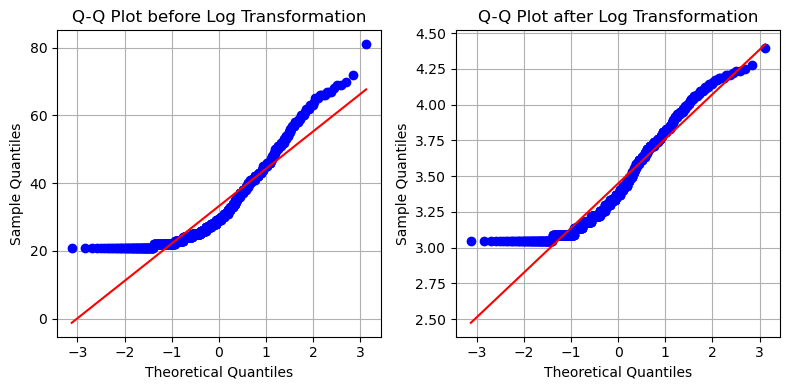

Square Root Transformation Skewness: 0.8506 (Reduction: 0.2790)


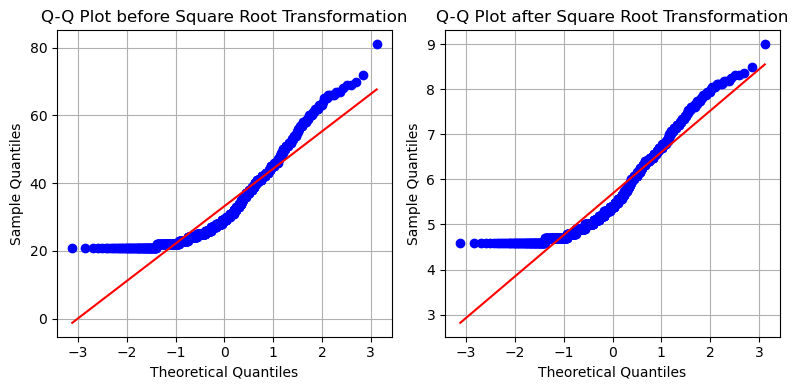



Column: Outcome
Initial Skewness: 0.6350
Log Transformation Skewness: 0.6350 (Reduction: -0.0000)


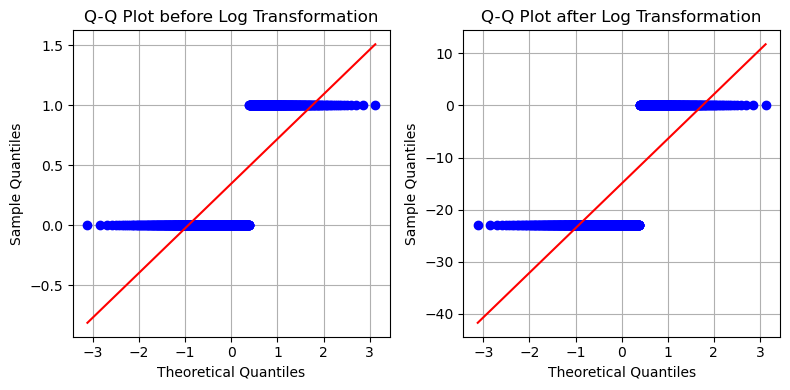

Square Root Transformation Skewness: 0.6350 (Reduction: 0.0000)


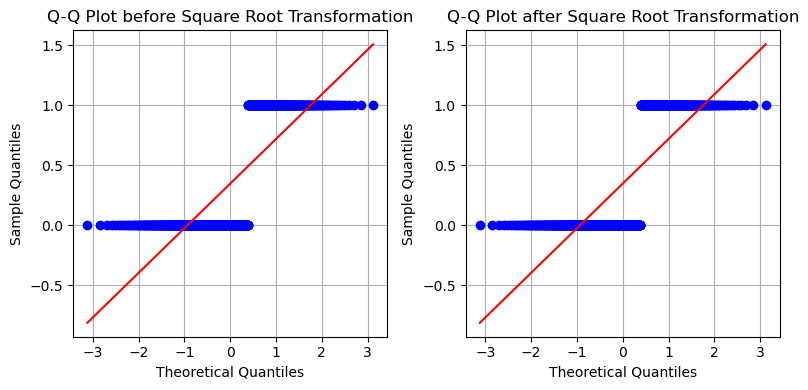

In [11]:


def compare_skewness(df):
    for column in df.columns:
        print(f"Column: {column}")
        
        initial_skewness = df[column].skew()
        print(f"Initial Skewness: {initial_skewness:.4f}")

        for transformation in ['Log Transformation', 'Square Root Transformation']:
            if transformation == 'Log Transformation':
                transformed_data = np.log(df[column] + 1e-10)
            else:
                transformed_data = np.sqrt(df[column])

            skewness = transformed_data.skew()
            skewness_reduction = initial_skewness - skewness
            print(f"{transformation} Skewness: {skewness:.4f} (Reduction: {skewness_reduction:.4f})")
            
            
            plt.figure(figsize=(8, 4))
            
            plt.subplot(1, 2, 1)
            stats.probplot(df[column], dist='norm', plot=plt)
            plt.title(f'Q-Q Plot before {transformation}')
            plt.xlabel('Theoretical Quantiles')
            plt.ylabel('Sample Quantiles')
            plt.grid(True)
            
            # Subplot 2: Q-Q plot after transformation
            plt.subplot(1, 2, 2)
            stats.probplot(transformed_data, dist='norm', plot=plt)
            plt.title(f'Q-Q Plot after {transformation}')
            plt.xlabel('Theoretical Quantiles')
            plt.ylabel('Sample Quantiles')
            plt.grid(True)

            plt.tight_layout()
            plt.show()

        print("\n")

compare_skewness(df)













            

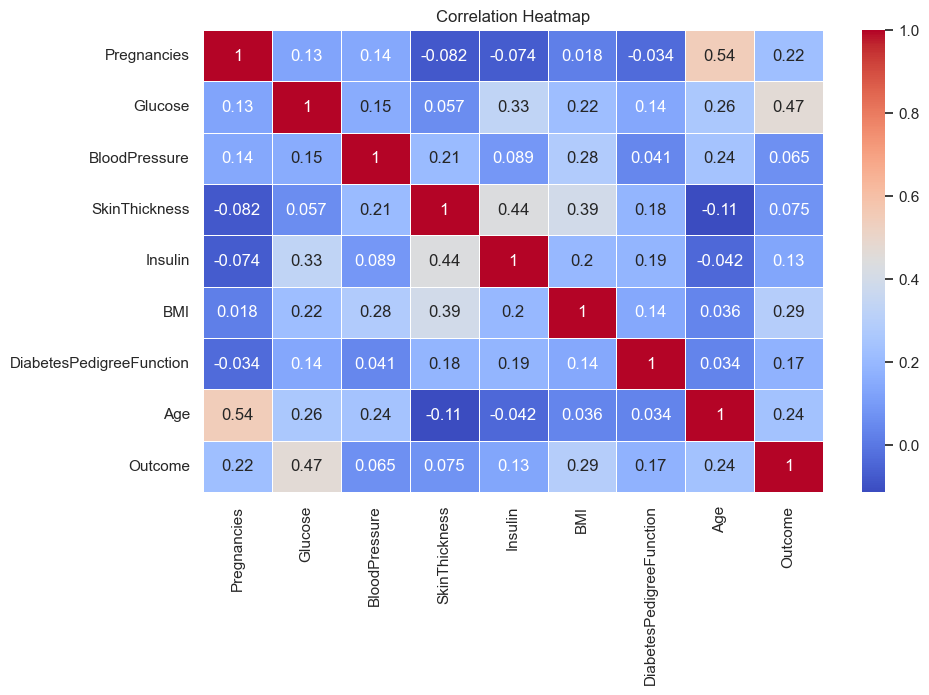

<Figure size 1200x600 with 0 Axes>

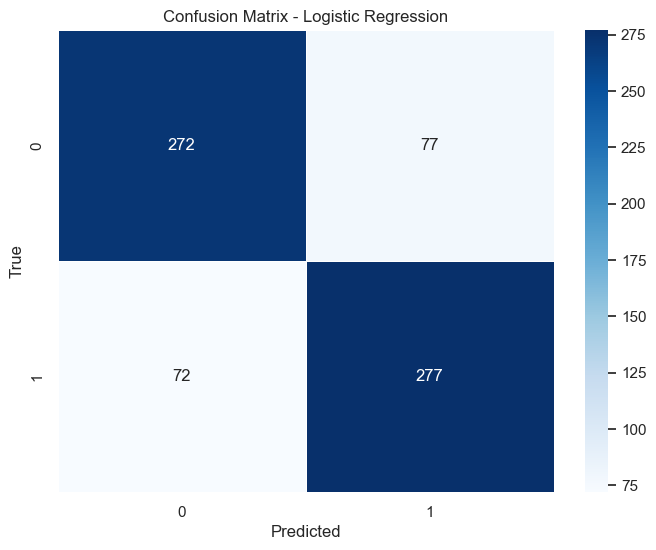

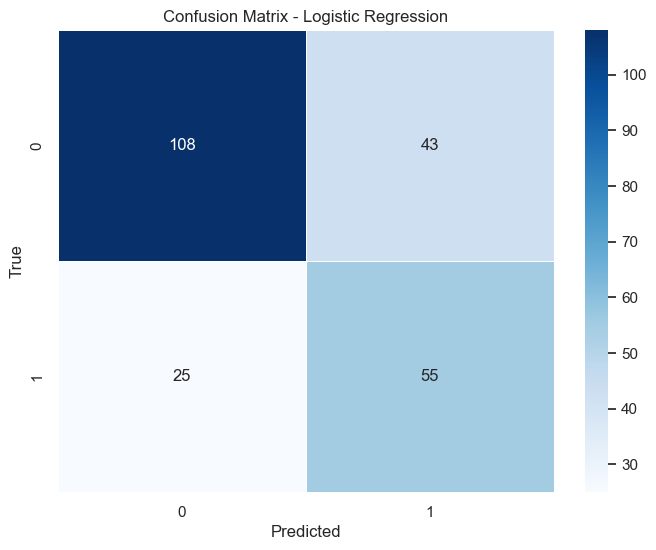

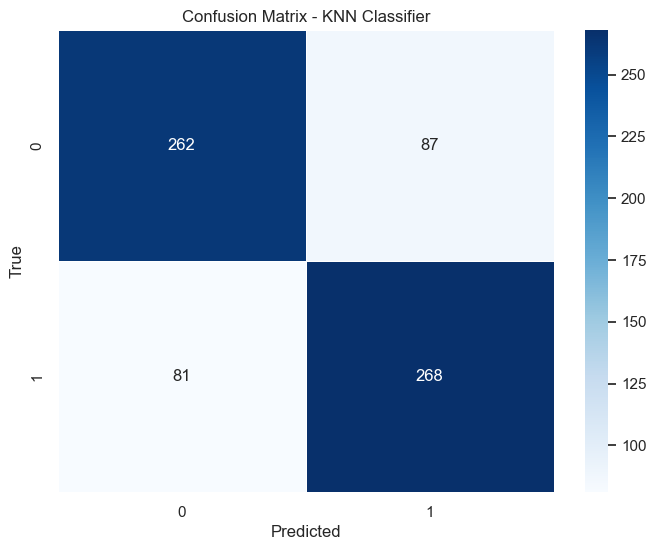

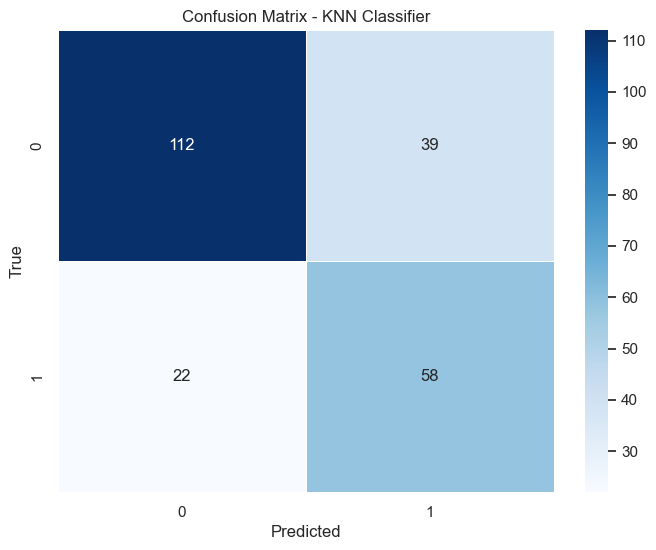

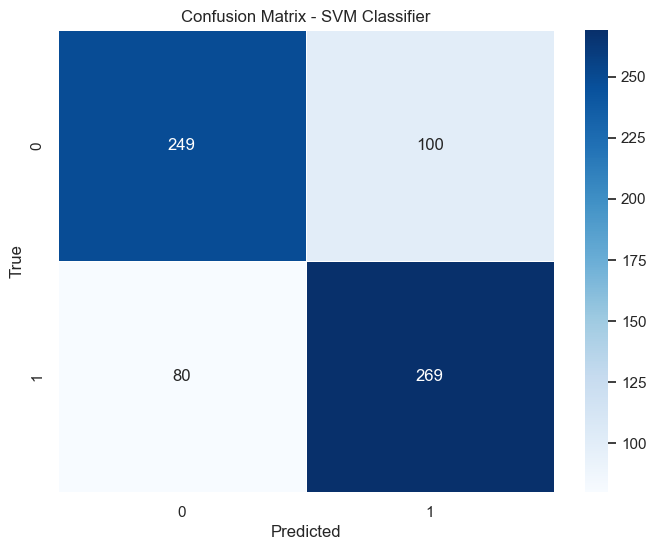

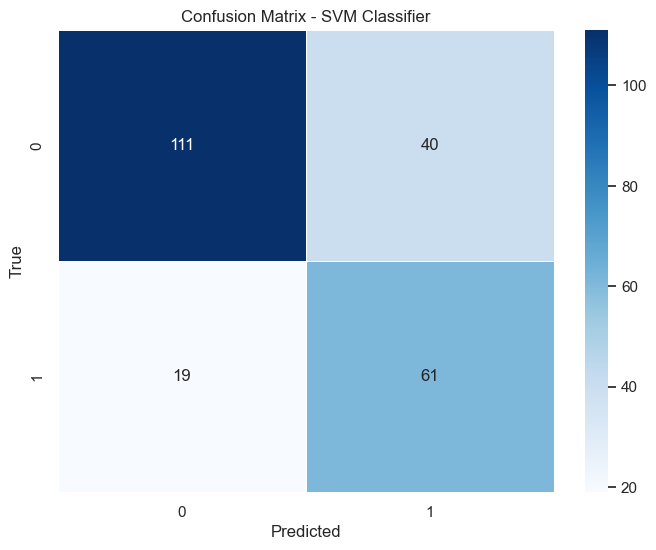

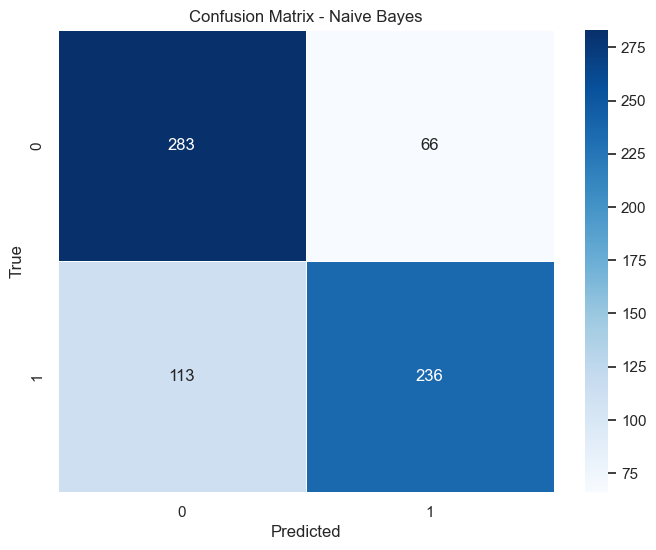

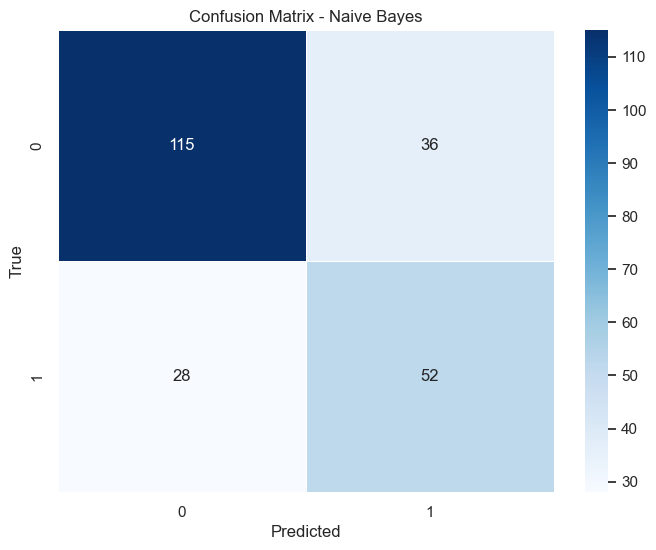

Evaluation Metrics - Training Set:
Logistic Regression:
Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
ROC AUC: 0.87

KNN Classifier:
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1 Score: 0.76
ROC AUC: 0.81

SVM Classifier:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1 Score: 0.74
ROC AUC: 0.80

Naive Bayes:
Accuracy: 0.74
Precision: 0.75
Recall: 0.74
F1 Score: 0.74
ROC AUC: 0.84

Evaluation Metrics - Test Set:
Logistic Regression:
Accuracy: 0.71
Precision: 0.73
Recall: 0.71
F1 Score: 0.71
ROC AUC: 0.77

KNN Classifier:
Accuracy: 0.74
Precision: 0.75
Recall: 0.74
F1 Score: 0.74
ROC AUC: 0.77

SVM Classifier:
Accuracy: 0.74
Precision: 0.77
Recall: 0.74
F1 Score: 0.75
ROC AUC: 0.79

Naive Bayes:
Accuracy: 0.72
Precision: 0.73
Recall: 0.72
F1 Score: 0.73
ROC AUC: 0.78



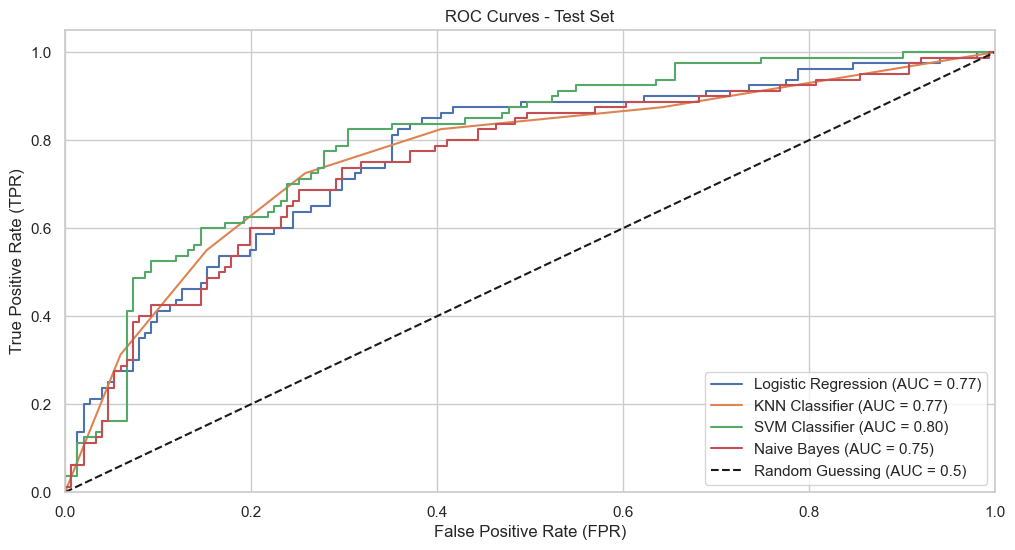

In [12]:
# Define the binary classification target variable
# Assuming 1 represents diabetic and 0 represents non-diabetic
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Perform EDA using Seaborn
sns.set(style="whitegrid")

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

results_train = {}
results_test = {}

roc_auc_train = {}
roc_auc_test = {}

confusion_matrices_train = {}
confusion_matrices_test = {}

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN Classifier': KNeighborsClassifier(),
    'SVM Classifier': SVC(probability=True),  
    'Naive Bayes': GaussianNB()  
}

param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1.0, 10.0]},
    'KNN Classifier': {'n_neighbors': [1, 3, 5, 7, 9]},
    'SVM Classifier': {'C': [0.001, 0.01, 0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}
}

feature_selection_methods = {
    'Logistic Regression': RFECV(estimator=LogisticRegression(), cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)),
    'KNN Classifier': SelectKBest(mutual_info_classif, k=5), # SelectKBest for KNN
    'SVM Classifier': SelectKBest(mutual_info_classif, k=5),
    'Naive Bayes': SelectKBest(mutual_info_classif, k=5)  # SelectKBest for Naive Bayes
}

plt.figure(figsize=(12, 6))

roc_auc_values = {}

for model_name, model in models.items():
    selector = feature_selection_methods[model_name]
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
        grid_search.fit(X_train_selected, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_selected, y_train) 
    
    #Perform cross-validation with the selected features and best hyperparameters on the training set
    y_pred_train = cross_val_predict(best_model, X_train_selected, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    f1_train = f1_score(y_train, y_pred_train, average='weighted')

    y_scores_train = cross_val_predict(best_model, X_train_selected, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), method='predict_proba')
    roc_auc_train[model_name] = roc_auc_score(y_train, y_scores_train[:, 1])  # Use positive class scores

    results_train[model_name] = {
        'Accuracy': accuracy_train,
        'Precision': precision_train,
        'Recall': recall_train,
        'F1 Score': f1_train,
        'ROC AUC': roc_auc_train[model_name]
    }

    X_test_selected = selector.transform(X_test)

    y_pred_test = best_model.predict(X_test_selected)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    y_scores_test = best_model.predict_proba(X_test_selected)
    roc_auc_test[model_name] = roc_auc_score(y_test, y_scores_test[:, 1])  
    results_test[model_name] = {
        'Accuracy': accuracy_test,
        'Precision': precision_test,
        'Recall': recall_test,
        'F1 Score': f1_test,
        'ROC AUC': roc_auc_test[model_name]
    }

    
    cm_train = confusion_matrix(y_train, y_pred_train)
    confusion_matrices_train[model_name] = cm_train

    cm_test = confusion_matrix(y_test, y_pred_test)
    confusion_matrices_test[model_name] = cm_test

    
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


print("Evaluation Metrics - Training Set:")
for model_name in models.keys():
    print(f"{model_name}:")
    print(f"Accuracy: {results_train[model_name]['Accuracy']:.2f}")
    print(f"Precision: {results_train[model_name]['Precision']:.2f}")
    print(f"Recall: {results_train[model_name]['Recall']:.2f}")
    print(f"F1 Score: {results_train[model_name]['F1 Score']:.2f}")
    print(f"ROC AUC: {results_train[model_name]['ROC AUC']:.2f}")
    print()

print("Evaluation Metrics - Test Set:")
for model_name in models.keys():
    print(f"{model_name}:")
    print(f"Accuracy: {results_test[model_name]['Accuracy']:.2f}")
    print(f"Precision: {results_test[model_name]['Precision']:.2f}")
    print(f"Recall: {results_test[model_name]['Recall']:.2f}")
    print(f"F1 Score: {results_test[model_name]['F1 Score']:.2f}")
    print(f"ROC AUC: {results_test[model_name]['ROC AUC']:.2f}")
    print()


plt.figure(figsize=(12, 6))

roc_auc_values_test = {}

for model_name, model in models.items():
    selector = feature_selection_methods[model_name]
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
        grid_search.fit(X_train_selected, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_selected, y_train) 
    
    X_test_selected = selector.transform(X_test)

    y_scores_test = best_model.predict_proba(X_test_selected)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores_test[:, 1])  # Use positive class scores

    roc_auc = auc(fpr, tpr)
    roc_auc_values_test[model_name] = roc_auc

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves - Test Set')
plt.legend(loc='lower right')
plt.show()


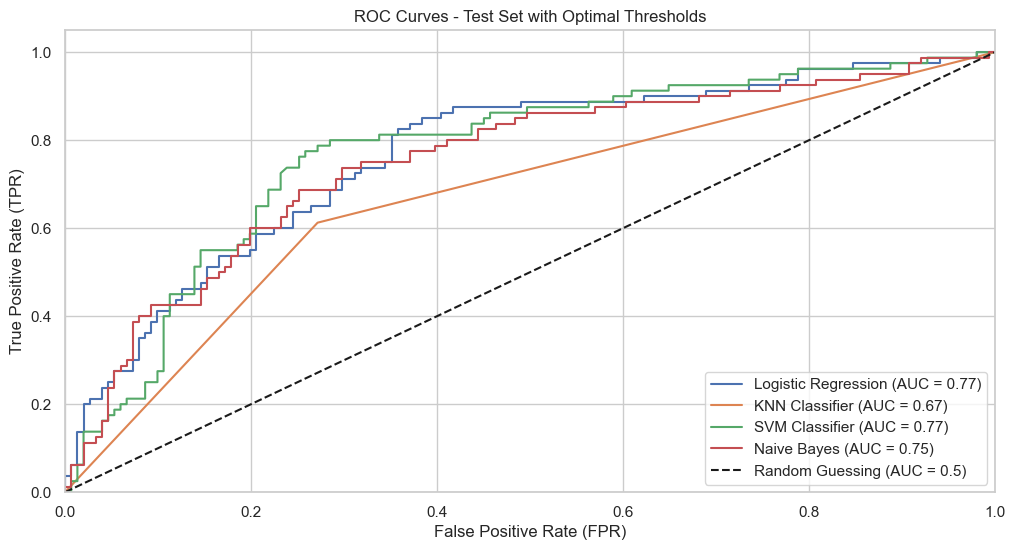

Optimal Thresholds for Desired FPR (50%):
Logistic Regression: 0.1890 (TPR at FPR 50.0% = 0.8750)
KNN Classifier: 0.4000 (TPR at FPR 50.0% = 0.8500)
SVM Classifier: 0.2558 (TPR at FPR 50.0% = 0.8625)
Naive Bayes: 0.2111 (TPR at FPR 50.0% = 0.8500)


In [13]:


desired_fpr = 0.5

optimal_thresholds = {}
tpr_at_desired_fpr = {}

for model_name, model in models.items():
    selector = feature_selection_methods[model_name]
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
        grid_search.fit(X_train_selected, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_selected, y_train) 
    
    X_test_selected = selector.transform(X_test)

    y_scores_test = best_model.predict_proba(X_test_selected)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores_test[:, 1])  
    
    #Find the threshold that achieves the desired FPR level (or closest to it)
    fpr_diff = np.abs(fpr - desired_fpr)
    closest_idx = np.argmin(fpr_diff)
    optimal_threshold = thresholds[closest_idx]
    
    #Store the optimal threshold and TPR at desired FPR
    optimal_thresholds[model_name] = optimal_threshold
    tpr_at_desired_fpr[model_name] = tpr[closest_idx]

#Plot ROC AUC curve for all models using the selected optimal threshold
plt.figure(figsize=(12, 6))

for model_name, model in models.items():
    selector = feature_selection_methods[model_name]
    X_train_selected = selector.fit_transform(X_train, y_train)
    
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
        grid_search.fit(X_train_selected, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_selected, y_train) 
    
    #Perform feature selection on the test set
    X_test_selected = selector.transform(X_test)

    #Make predictions using the selected optimal threshold
    y_pred_prob = best_model.predict_proba(X_test_selected)
    y_pred = (y_pred_prob[:, 1] >= optimal_thresholds[model_name]).astype(int)
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
    
    #Calculate ROC AUC for the test set using the selected threshold
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves - Test Set with Optimal Thresholds')
plt.legend(loc='lower right')
plt.show()

#Print the optimal thresholds and corresponding TPR values
print("Optimal Thresholds for Desired FPR (50%):")
for model_name in models.keys():
    print(f"{model_name}: {optimal_thresholds[model_name]:.4f} (TPR at FPR {desired_fpr*100}% = {tpr_at_desired_fpr[model_name]:.4f})")


In [14]:
#As the evaluation metrics values are relatively high for both training and test datasets for all models and evaluation metrics values are relatively consistent for all the models across the training set and train set we can conclude that significant underfitting and overfitting conditions are avoided for all the models

In [15]:
#We will choose a model which has higher recall and higher roc auc values given our goal of minimizing false negatives (positive cases detected as negative having higher consequences than negative cases being classified as positive ) and the  highest roc_auc values among the same 

In [20]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Outcome'])
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

y_val_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_val_pred)
print(f"Validation Accuracy: {accuracy:.2%}")

joblib.dump(model, "logistic_regression_model.joblib")

print("Model saved successfully.")


Validation Accuracy: 74.68%
Model saved successfully.


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
!pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/c5/ea/b50f166fb6e5c244568f798ade98fa261b82588ab9ad83230b327a82b42f/streamlit-1.31.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/c5/e4/7fcceef127badbb0d644d730d992410e4f3799b295c9964a172f92a469c7/altair-5.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich<14,>=10.14.0 from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for tzlocal<6,>=1.1 from https://files.pythonhosted.org/packages/97/3f/c4c51c55ff8487f2e6d0e618dba917e3c3ee2caae6cf0fbb59c9b1876f2e/tzlo

In [29]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

model = joblib.load("logistic_regression_model.joblib")

st.title("Diabetes Prediction App")

feature1 = st.slider("Pregnancies", 0.0, 17.0)
feature2 = st.slider("Glucose", 0.0, 199.0)
feature3 = st.slider("BloodPressure", 0.0, 122.0)
feature4 = st.slider("SkinThickness", 0.0, 99.0)
feature5 = st.slider("Insulin", 0.0, 846.0)
feature6 = st.slider("BMI", 0.0, 67.0)
feature7 = st.slider("DiabetesPedigreeFunction", 0.0, 2.42)
feature8 = st.slider("Age", 0.0, 81.0)


input_data = np.array([[feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8]])

prediction = model.predict(input_data)

st.write(f"Prediction: {int(prediction[0])}")



Overwriting app.py
